# Отчет по практическому заданию №1 
## Постановка задачи
Вычислить интеграл $\displaystyle{\int\limits_{-1}^1dx\int\limits_{-1}^1dy\int\limits_{-1}^1dz  ~ \frac{1}{2+x^2+y^2+z^2}}$ с точность 3\% методом Монте-Карло.

# Тройной интеграл, решение с помощью библиотеки scipy

In [57]:
import scipy.integrate

def f(x, y, z): return 1/(2+x**2+y**2+z**2)  # Задаю функцию 

I=scipy.integrate.tplquad(f, -1, 1, lambda x: -1, lambda x: 1, lambda x, y: -1, lambda x, y: 1)  # Интегрирует

print(I)


(2.7464757046266577, 1.776353308652888e-11)


### Получили значение интеграла равное $2.76475704627 \pm 1.7 \cdot 10^{-11}$
# Решение тройного интеграла методом Монте-Карло
Задаю случайные числа

In [58]:
import numpy as np
N=900

xu=np.random.sample((N))    # Создаю случайные числа от 0 до 1
xr=2*np.random.sample((3,N)) -1  # Создаю случайные числа от -1 до 1 для трёх осей: x,y,z

x=np.vstack((xu,xr))       # Объединяю 2 массива

print(x)

[[ 0.86462007  0.28964163  0.12429832 ...  0.41466936  0.88066892
   0.16030012]
 [ 0.39745311  0.57241384  0.91946776 ...  0.3200446  -0.7353876
  -0.11630668]
 [ 0.7444712   0.33697374 -0.55409159 ...  0.01345597 -0.95227908
  -0.47767169]
 [ 0.26627133 -0.8661781   0.84984386 ... -0.1069947  -0.69243118
   0.84509233]]


### Сравниваю случайные точки с заданным распределением

In [59]:
p=0 # Кол-во подходящих значений
q=0 

for i in range(N):
    f=1/((x[1,i])**2+(x[2,i])**2+(x[3,i])**2+2)
#  f=1/((y0[i])**2+(y1[i])**2+(y2[i])**2+2)
    if x[0,i]<f:
        p+=1
    else:
        q+=1
print(p/(p+q))

0.3433333333333333


In [60]:
print(p/(p+q)*8)

2.7466666666666666


Умножение на 8 нужно, так как для четырех-мерного измерения получился рассматриваемый объем случайных чисел $V^4 = 2 \cdot 2\cdot 2\cdot 1$ для x, y, z и f(x,y,z) соответственно

# Оценка дисперсии

In [61]:
s=0
s2=0
D=0

for i in range(N):
    s+=(x[0,i])
    s2+=(x[0,i])**2
    
D+=1/(N-1)*(1/N*s2-(1/N*s)**2)

print(s,s2,D)

451.75569237355467 303.3098640061442 9.461221935706339e-05


In [62]:
print(3*np.sqrt(D)*100, '%')

2.9180643827948183 %


###  Таким образом для N=900 ошибка с вероятностью 0.997 не превосходит 0,3%

## Наглядное представление кол-ва использованных случайных точек

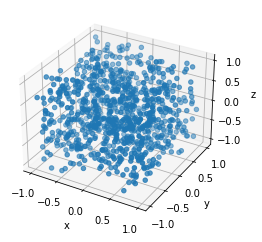

In [63]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(x[1,:],x[2,:],x[3,:])

plt.show()